In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from mechafil import data
import pandas as pd
import numpy as np

import copy

from agentfil.filecoin_model import FilecoinModel

In [3]:
simulation_start_date = datetime.today().date() - timedelta(days=1)
forecast_length = 365*2
end_date = simulation_start_date + timedelta(days=forecast_length)

num_agents = 20

In [4]:
simulation_start_date

datetime.date(2023, 1, 17)

In [5]:
# get historical stats for comparison
data_start_date = date(2021,3,15)

historical_stats = data.get_historical_network_stats(data_start_date, simulation_start_date, end_date)
scheduled_df = data.query_sector_expirations(data_start_date, end_date)
historical_stats['date'] = pd.to_datetime(historical_stats['date']).dt.date
scheduled_df['date'] = scheduled_df['date'].dt.date
merged_df = historical_stats.merge(scheduled_df, on='date', how='inner')

In [7]:
filecoin_model = FilecoinModel(num_agents, simulation_start_date, end_date)

/opt/anaconda3/envs/cel/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [8]:
fdf = filecoin_model.filecoin_df
fdf_subset = fdf[fdf['date'] <= merged_df.iloc[-1]['date']]

<IPython.core.display.Javascript object>


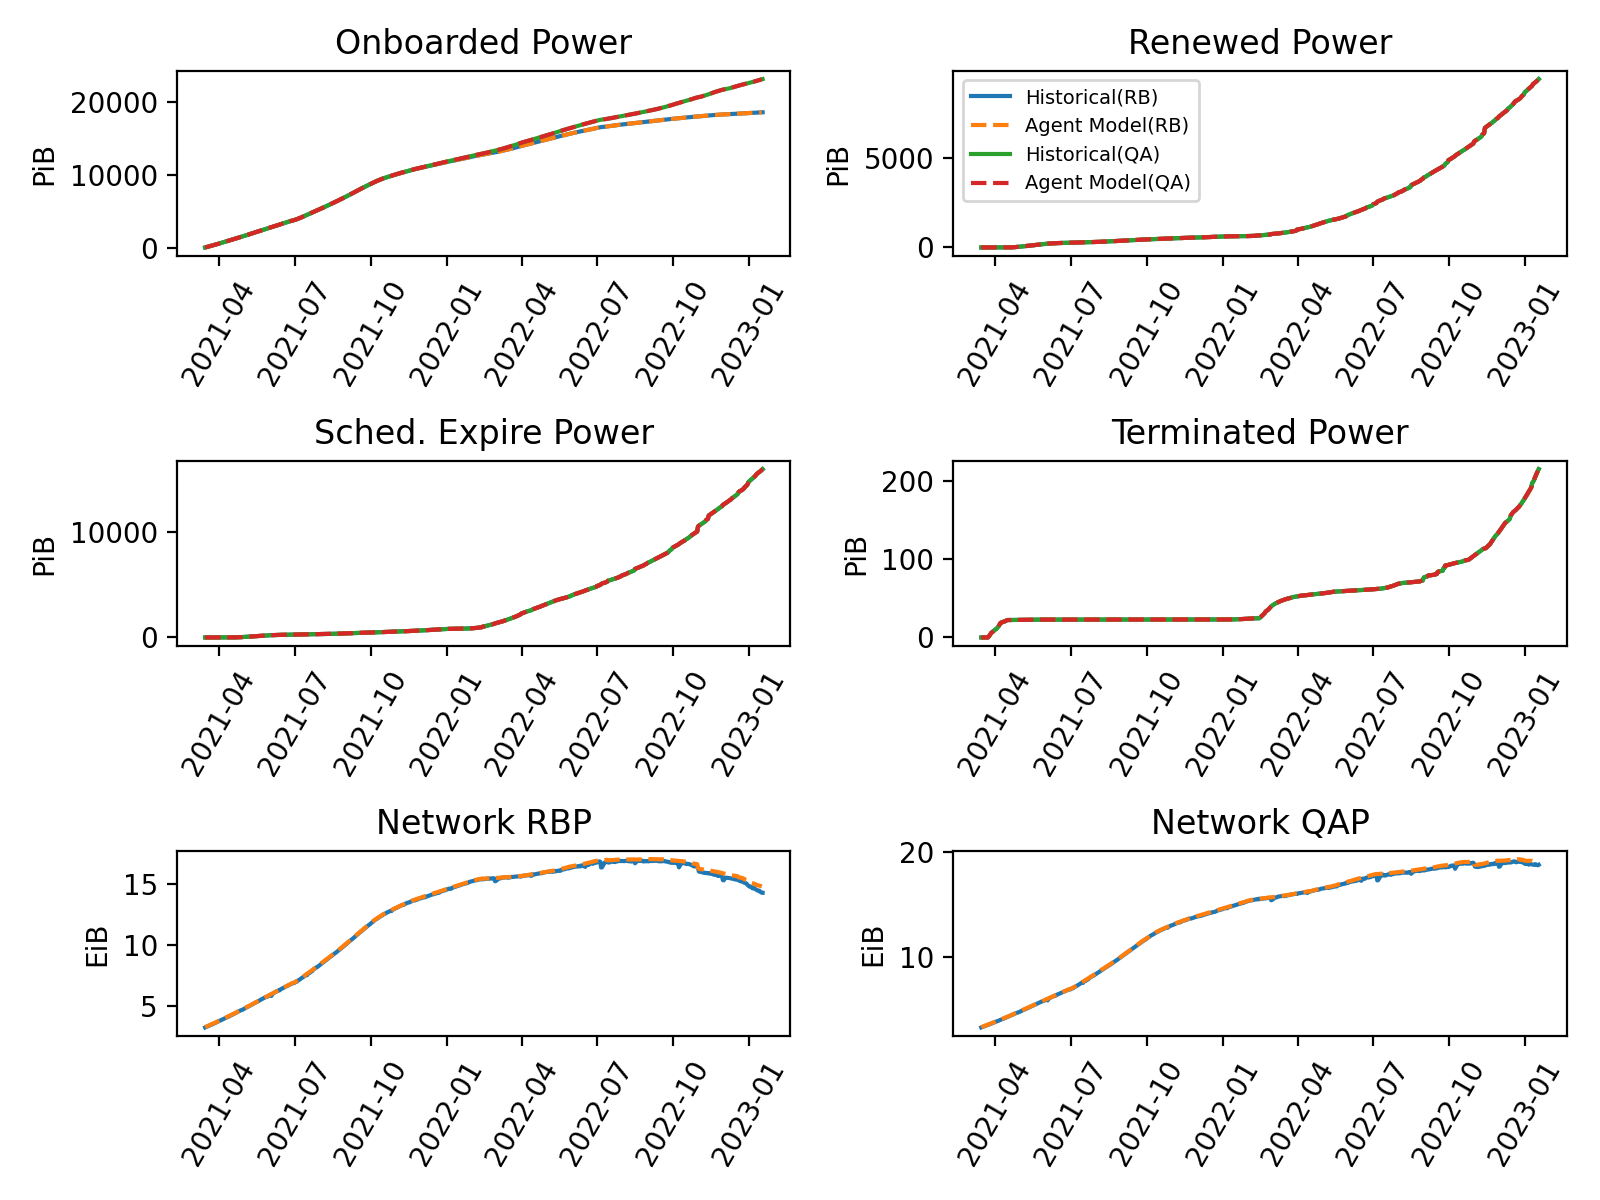

In [9]:
plt.figure(figsize=(8,6))

plt.subplot(3,2,1)
plt.plot(merged_df['date'], merged_df['day_onboarded_rb_power_pib'].cumsum(), label='Historical (RB)')
plt.plot(fdf_subset['date'], fdf_subset['day_onboarded_rbp_pib'].cumsum(), linestyle='--', label='Agent Model (RB)')
plt.plot(merged_df['date'], merged_df['day_onboarded_qa_power_pib'].cumsum(), label='Historical (QA)')
plt.plot(fdf_subset['date'], fdf_subset['day_onboarded_qap_pib'].cumsum(), linestyle='--', label='Agent Model (QA)')
plt.xticks(rotation=60)
plt.title('Onboarded Power')
plt.ylabel('PiB')

plt.subplot(3,2,2)
plt.plot(merged_df['date'], merged_df['extended_rb'].cumsum(), label='Historical(RB)')
plt.plot(fdf_subset['date'], fdf_subset['day_renewed_rbp_pib'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['extended_qa'].cumsum(), label='Historical(QA)')
plt.plot(fdf_subset['date'], fdf_subset['day_renewed_qap_pib'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Renewed Power')
plt.ylabel('PiB')
plt.legend(fontsize=7)

plt.subplot(3,2,3)
plt.plot(merged_df['date'], merged_df['total_rb'].cumsum(), label='Historical(RB)')
plt.plot(fdf_subset['date'], fdf_subset['day_sched_expire_rbp_pib'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['total_qa'].cumsum(), label='Historical(QA)')
plt.plot(fdf_subset['date'], fdf_subset['day_sched_expire_qap_pib'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Sched. Expire Power')
plt.ylabel('PiB')

plt.subplot(3,2,4)
plt.plot(merged_df['date'], merged_df['terminated_rb'].cumsum(), label='Historical(RB)')
plt.plot(fdf_subset['date'], fdf_subset['day_terminated_rbp_pib'].cumsum(), linestyle='--', label='Agent Model(RB)')
plt.plot(merged_df['date'], merged_df['terminated_qa'].cumsum(), label='Historical(QA)')
plt.plot(fdf_subset['date'], fdf_subset['day_terminated_qap_pib'].cumsum(), linestyle='--', label='Agent Model(QA)')
plt.xticks(rotation=60)
plt.title('Terminated Power')
plt.ylabel('PiB')

plt.subplot(3,2,5)
plt.plot(merged_df['date'], merged_df['total_raw_power_eib'], label='Historical')
plt.plot(fdf_subset['date'], fdf_subset['total_raw_power_eib'], linestyle='--', label='Agent Model(RB)')
plt.ylabel('EiB')
plt.title('Network RBP')
plt.xticks(rotation=60)

plt.subplot(3,2,6)
plt.plot(merged_df['date'], merged_df['total_qa_power_eib'], label='Historical')
plt.plot(fdf_subset['date'], fdf_subset['total_qa_power_eib'], linestyle='--', label='Agent Model(QA)')
plt.ylabel('EiB')
plt.title('Network QAP')
plt.xticks(rotation=60)

plt.tight_layout()

<IPython.core.display.Javascript object>


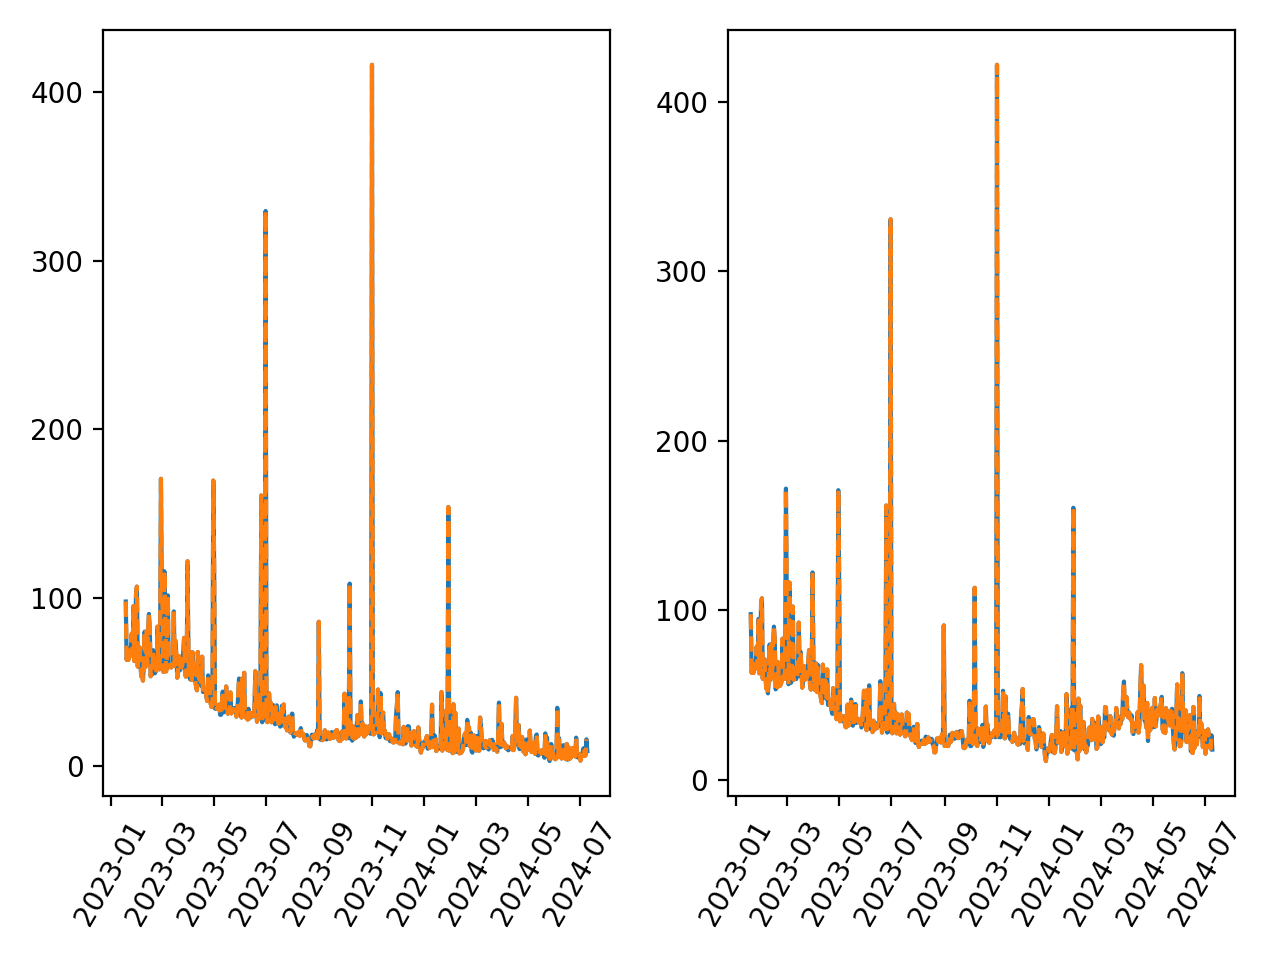

In [10]:
# check the future powers
future_scheduled_df = scheduled_df[scheduled_df['date'] > simulation_start_date]
max_date = future_scheduled_df.iloc[-1]['date']

sedf = fdf[(fdf['date'] > merged_df.iloc[-1]['date']) & (fdf['date'] <= max_date)]

plt.figure()
plt.subplot(1,2,1)
plt.plot(future_scheduled_df['date'], future_scheduled_df['total_rb'], label='Historical')
plt.plot(sedf['date'], sedf['day_sched_expire_rbp_pib'], label='Model', linestyle='--')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.plot(future_scheduled_df['date'], future_scheduled_df['total_qa'], label='Historical')
plt.plot(sedf['date'], sedf['day_sched_expire_qap_pib'], label='Model', linestyle='--')
plt.xticks(rotation=60)

plt.tight_layout()

In [12]:
fdf

,date,days,network_baseline,cum_simple_reward,total_vest,day_onboarded_rbp_pib,day_onboarded_qap_pib,day_renewed_rbp_pib,day_renewed_qap_pib,day_sched_expire_rbp_pib,...,vested_fil,locked_fil,burnt_fil,disbursed_reserve,network_gas_burn,day_locked_pledge,day_renewed_pledge,network_locked_pledge,network_locked,network_locked_reward
0,2021-03-15,1,4.248358e+18,1.044303e+05,1.093991e+08,30.778351,30.809411,0.0,0.0,0.000000,...,1.087510e+08,4.873596e+07,1.906991e+07,1.706662e+07,0,0,0,0.0,0.0,0.0
1,2021-03-16,2,4.256434e+18,2.088276e+05,1.100472e+08,30.751831,30.778159,0.0,0.0,0.000305,...,1.093991e+08,4.913035e+07,1.916571e+07,1.706662e+07,0,0,0,0.0,0.0,0.0
2,2021-03-17,3,4.264525e+18,3.131918e+05,1.106954e+08,31.845703,31.854920,0.0,0.0,0.000061,...,1.100472e+08,4.953880e+07,1.919340e+07,1.706662e+07,0,0,0,0.0,0.0,0.0
3,2021-03-18,4,4.272631e+18,4.175230e+05,1.113435e+08,31.429504,31.464130,0.0,0.0,0.000031,...,1.106954e+08,4.994090e+07,1.925624e+07,1.706662e+07,0,0,0,0.0,0.0,0.0
4,2021-03-19,5,4.280752e+18,5.218212e+05,1.119917e+08,31.384003,31.454148,0.0,0.0,0.000031,...,1.113435e+08,5.034152e+07,1.930788e+07,1.706662e+07,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2025-01-11,1399,6.042369e+19,1.180604e+08,4.803122e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.706662e+07,0,0,0,0.0,0.0,0.0
1399,2025-01-12,1400,6.053855e+19,1.181275e+08,4.804993e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.706662e+07,0,0,0,0.0,0.0,0.0
1400,2025-01-13,1401,6.065362e+19,1.181945e+08,4.806865e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.706662e+07,0,0,0,0.0,0.0,0.0
1401,2025-01-14,1402,6.076892e+19,1.182615e+08,4.808736e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.706662e+07,0,0,0,0.0,0.0,0.0


In [13]:
fdf.columns

Index(['date', 'days', 'network_baseline', 'cum_simple_reward', 'total_vest',
       'day_onboarded_rbp_pib', 'day_onboarded_qap_pib', 'day_renewed_rbp_pib',
       'day_renewed_qap_pib', 'day_sched_expire_rbp_pib',
       'day_sched_expire_qap_pib', 'day_terminated_rbp_pib',
       'day_terminated_qap_pib', 'day_network_rbp_pib', 'day_network_qap_pib',
       'total_raw_power_eib', 'total_qa_power_eib', 'capped_power',
       'cum_capped_power', 'network_time', 'cum_baseline_reward',
       'cum_network_reward', 'day_network_reward', 'circ_supply', 'mined_fil',
       'vested_fil', 'locked_fil', 'burnt_fil', 'disbursed_reserve',
       'network_gas_burn', 'day_locked_pledge', 'day_renewed_pledge',
       'network_locked_pledge', 'network_locked', 'network_locked_reward'],
      dtype='object')